# Track objects using SiamMask

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Track-objects-using-SiamMask" data-toc-modified-id="Track-objects-using-SiamMask-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Track objects using SiamMask</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#SiamMask-architecture" data-toc-modified-id="SiamMask-architecture-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>SiamMask architecture</a></span></li></ul></li><li><span><a href="#SiamMask-implementation-in-arcgis.learn" data-toc-modified-id="SiamMask-implementation-in-arcgis.learn-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>SiamMask implementation in <code>arcgis.learn</code></a></span><ul class="toc-item"><li><span><a href="#Using-DAVIS-pretrained-weights" data-toc-modified-id="Using-DAVIS-pretrained-weights-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Using DAVIS pretrained weights</a></span></li><li><span><a href="#Train-SiamMask-model-using-custom-dataset" data-toc-modified-id="Train-SiamMask-model-using-custom-dataset-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Train SiamMask model using custom dataset</a></span></li><li><span><a href="#Fine-tune-pre-trained-model" data-toc-modified-id="Fine-tune-pre-trained-model-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Fine-tune pre-trained model</a></span><ul class="toc-item"><li><span><a href="#Load-the-model" data-toc-modified-id="Load-the-model-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Load the model</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-1.1.3.2"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Save-the-model" data-toc-modified-id="Save-the-model-1.1.3.3"><span class="toc-item-num">1.1.3.3&nbsp;&nbsp;</span>Save the model</a></span></li></ul></li></ul></li><li><span><a href="#init-and-update-methods" data-toc-modified-id="init-and-update-methods-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>init and update methods</a></span><ul class="toc-item"><li><span><a href="#Initialize-the-object" data-toc-modified-id="Initialize-the-object-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Initialize the object</a></span></li><li><span><a href="#Update-the-location-of-the-object" data-toc-modified-id="Update-the-location-of-the-object-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Update the location of the object</a></span></li><li><span><a href="#Track-object-in-a-video-using-SiamMask-" data-toc-modified-id="Track-object-in-a-video-using-SiamMask--1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Track object in a video using SiamMask <a class="anchor" id="trackObject"></a></a></span></li><li><span><a href="#Using-SiamMask-model-in-ArcGIS-Pro-2.8" data-toc-modified-id="Using-SiamMask-model-in-ArcGIS-Pro-2.8-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Using SiamMask model in <em>ArcGIS Pro 2.8</em></a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

**Object Tracking** is a methodology that helps to monitor the location of objects over a sequence of video frames.

**SiamMask** is a deep learning model architecture which performs both Visual Object Tracking (VOT) and semi-supervised Video Object Segmentation (VOS). Given the location of the object in the first frame of the sequence, the aim of **VOT** is to estimate an object's position in subsequent frames with the best possible accuracy. Similarly, the main goal of **VOS** is to output a binary segmentation mask which expresses whether or not a pixel belongs to the target. In other words, SiamMask takes as input a single object bounding box for initialization and outputs segmentation mask and object bounding box for each subsequent frame of a video.


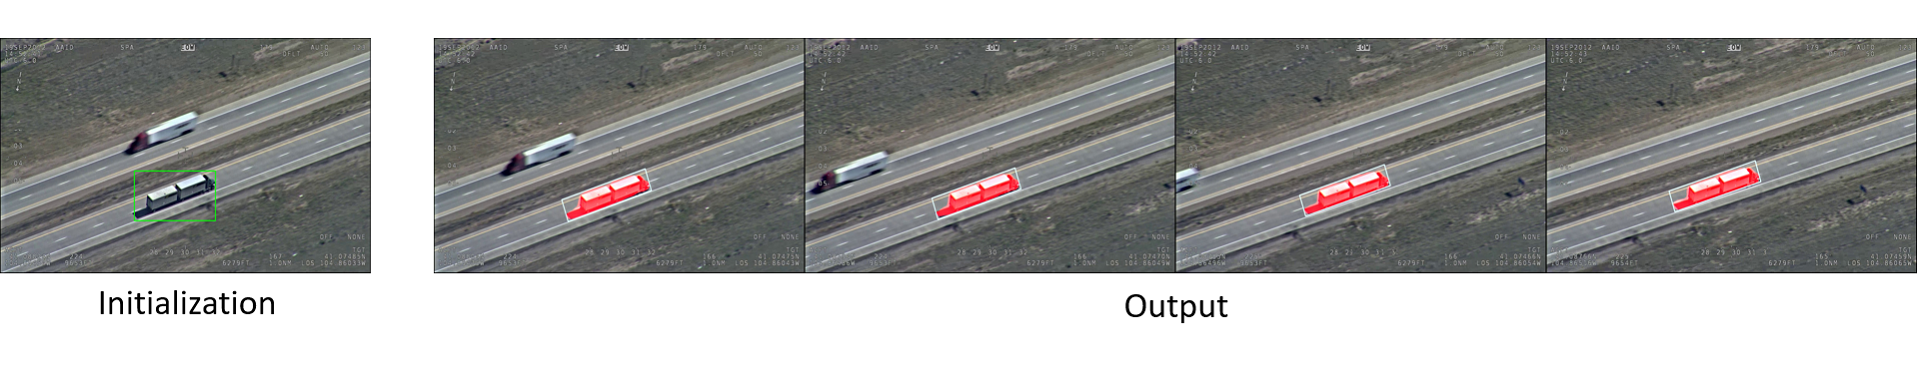

### SiamMask architecture

SiamMask improves over its siamese-network based predecessors by adding a new branch to produce a pixel-wise binary mask. As depicted below, there is a three-branch variant and a two-branch variant.

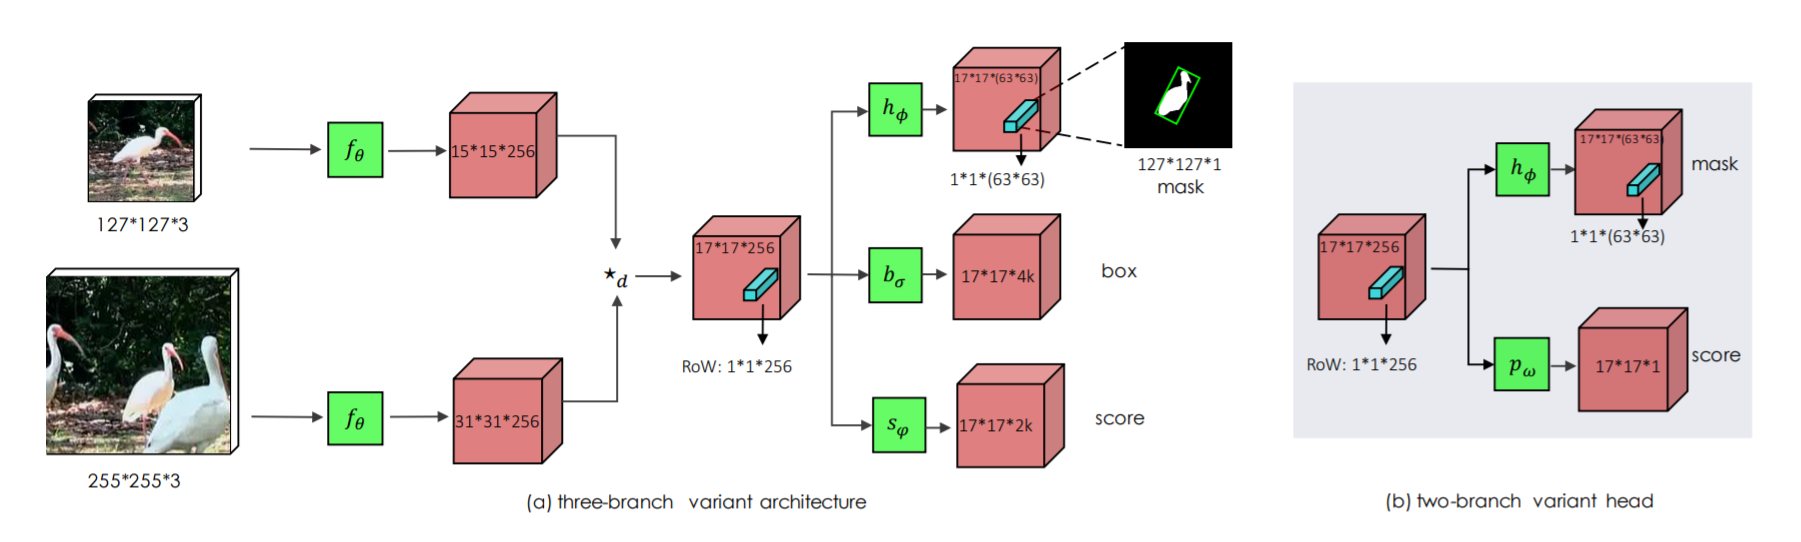

**Backbone** SiamMask uses ResNet-50 as backbone. The architecture depicted below uses the first 4 stages of ResNet, adjust layer and depth-wise cross-correlation resulting in a feature map of size 17×17.


**Network heads** The conv5 block in the architecture contains a normalisation layer and ReLU non-linearity activation layer while conv6 only consists of a 1×1 convolutional layer.

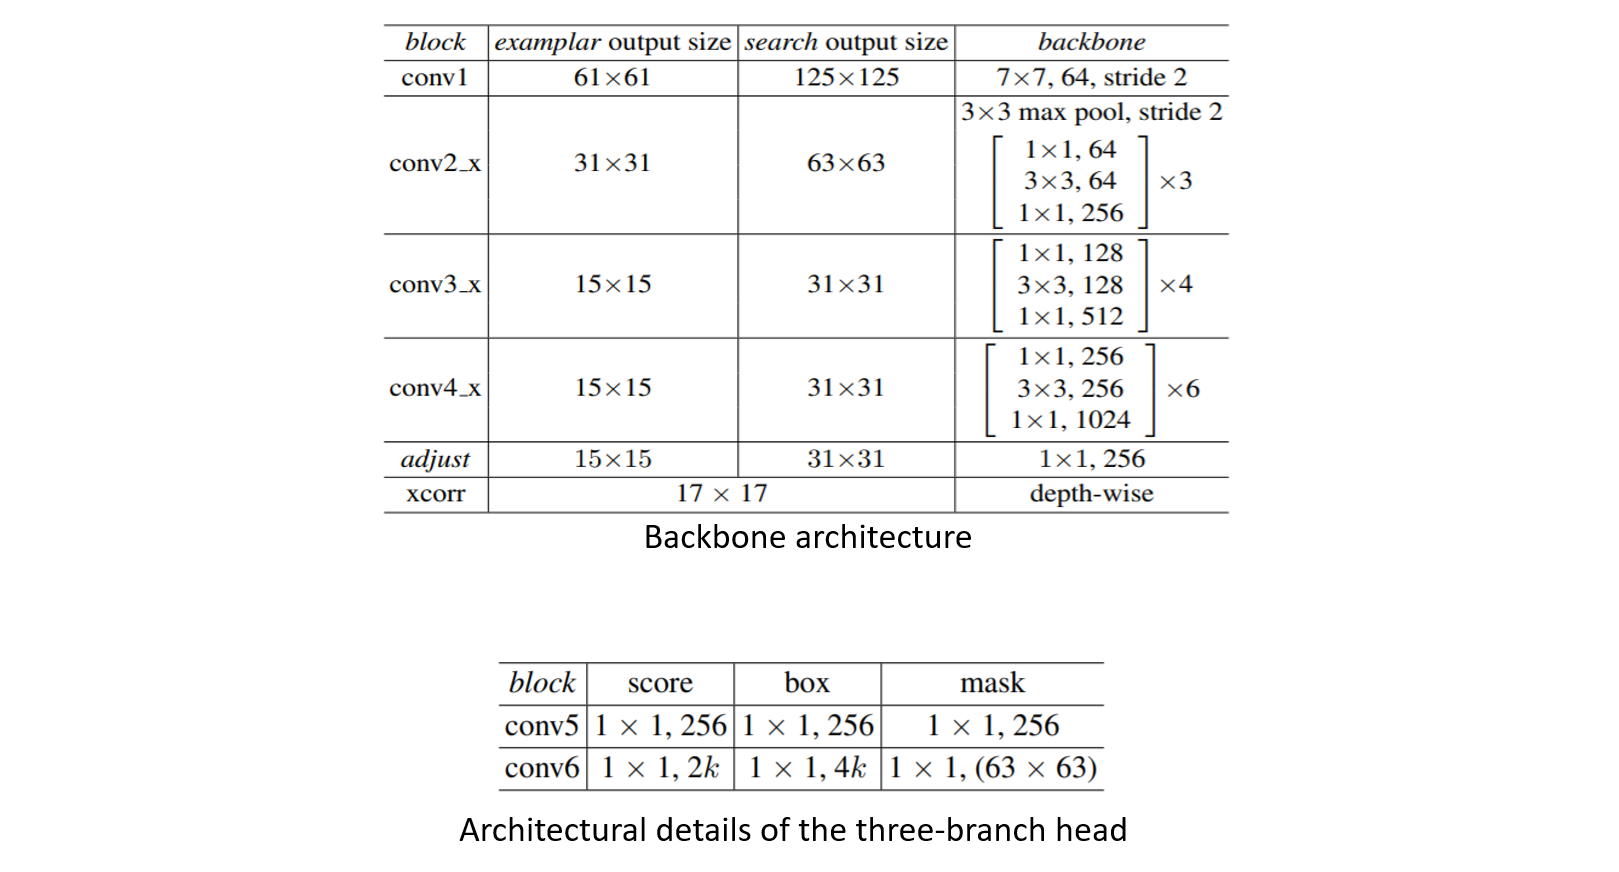


**Refinement** This module merges low and high resolution features using multiple refinement steps making use of upsampling layers and skip connections.

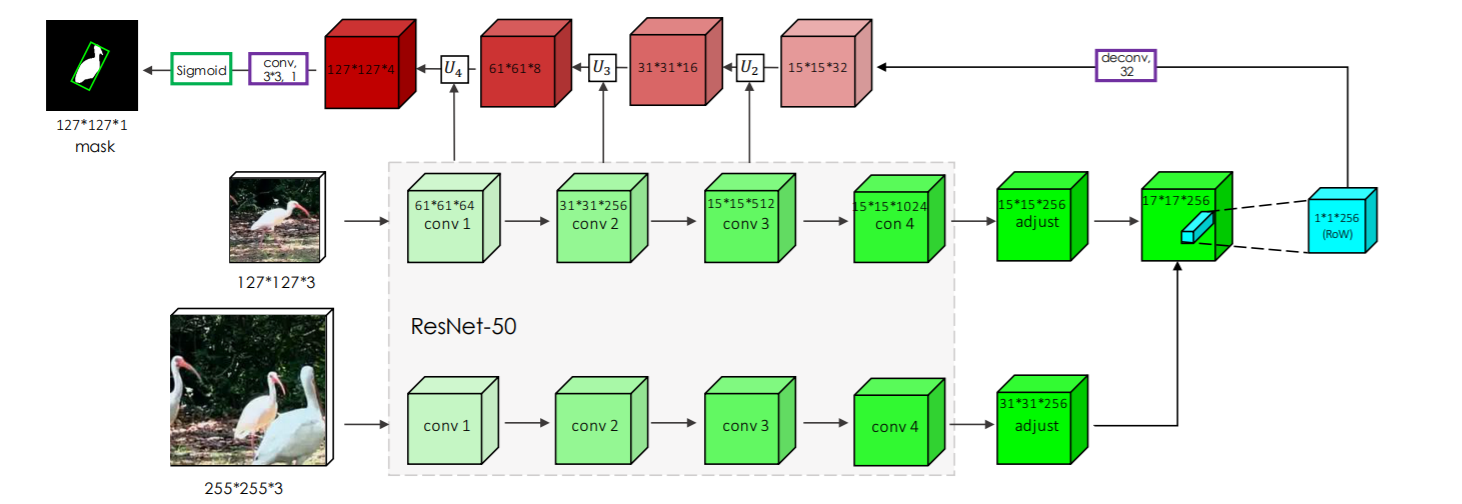



## SiamMask implementation in `arcgis.learn`

Import the SiamMask class from arcgis.learn module.

In [ ]:
from arcgis.learn import SiamMask

### Using DAVIS pretrained weights

To use DAVIS pretrained weights, instantiate model object as follows:

In [ ]:
ot = SiamMask()

**Note**: the model must be initialized without providing any data. Because we are not training the model and instead using the pre-trained weights, we do not require a databunch. The initialized model can be used to [track object](#trackObject) .

### Train SiamMask model using custom dataset

Prepare databunch for SiamMask model using prepare_data() in arcgis.learn.

When we have data in Youtube_VOS dataset format, we can call the prepare_data function with dataset_type='ObjectTracking' and for better results use batch_size=64.

In [ ]:
from arcgis.learn import prepare_data
data = prepare_data(r"path_to_data_folder", dataset_type="ObjectTracking", batch_size=64)

Once the data is prepared, SiamMask model object can be instantiated as follows:

In [ ]:
ot = SiamMask(data)

### Fine-tune pre-trained model

#### Load the model

In [ ]:
ot.load(r"path_to_emd_file")

#### Train the model

In [ ]:
ot.fit(10)

#### Save the model

In [ ]:
ot.save("path_to_save_model")

To use the model in *ArcGIS Pro*, pass an additional parameter `framework` set to "torchscript". Doing so will create additional model files inside 'torch_scripts' folder, which can be loaded and used in *ArcGIS Pro*.

In [ ]:
ot.save("path_to_save_model", framework="torchscript")

## init and update methods

### Initialize the object

**init** method helps in initializing objects using bounding boxes.

In [ ]:
tracks = ot.init(img, [[x,y,w,h]], [["truck"]])

* The parameters to be passed are as follows:
    * `frame`: Required numpy array. Frame from the video used to initialize object(s) to track.
    
    * `detections`: Required list. A list of bounding boxes to intialize object(s). 
                    Eg: [[x, y, w, h]]
                    
                    x, y, w, h represents value of x-cordinate, y-cordinate, width of bbox, height of bbox
                    respectively.
    
    * `labels`: Optional list. A list of labels that represents the class of object(s).
    
    * `reset`: Optional Boolean. If set to True all the previous track(s) will get reset.
    

The method returns list of initialized tracks.
    
**Note**: The length of detections should match to the length of labels.

### Update the location of the object

**update** method helps in updating the tracks in the next frames.

In [ ]:
state = ot.update(frame)

* The parameters to be passed are as follows:
    * `frame`: Required numpy array. Frame from the video used to update the track(s) of object(s).

The method returns list of updated tracks.

### Track object in a video using SiamMask <a class="anchor" id="trackObject"></a>

The sample code below depicts usage of SiamMask model using ArcGIS API for Python.

* Execute the cell below to play the video.
* Press **spacebar** to pause the video.
* Use your mouse to annotate the object in the frame.
* Once annotated, press **spacebar** to track the object.
* Press **q** to quit.

In [ ]:
import numpy as np
import cv2
from arcgis.learn import SiamMask

ot = SiamMask.from_model("path_to_save_model")

cap = cv2.VideoCapture(r"path_to_video_file")

initialized = False
while(True):
    ret, frame = cap.read()
    if ret is False:
        break
    if initialized:
        state = ot.update(frame)  ## Update the track location in the frame
        for track in state:
            mask = track.mask
            frame[:, :, 2] = (mask > 0) * 255 + (mask == 0) * frame[:, :, 2]
            cv2.polylines(frame, [np.int0(track.location).reshape((-1, 1, 2))], True, (w, 255, h), 1)
            
    cv2.imshow('frame',frame)
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break
    
    if key == 32:
        init_rect = cv2.selectROI('frame', frame, False, False)
        values = np.array(init_rect)
        if all(values == 0):
            continue
        x, y, w, h = init_rect
        state = ot.init(frame, [[x,y,w,h]]) ## Initialize the track in the frame
        initialized = True
        cv2.waitKey()

cap.release()
cv2.destroyAllWindows()

### Using SiamMask model in *ArcGIS Pro 2.8*

*ArcGIS Pro 2.8* only supports model saved using ArcGIS API for Python v1.8.5. If you are using ArcGIS API for Python v1.9.0 to train the model, follow the steps below:

***Step 1***: Train and save the model

In [ ]:
ot = SiamMask(data)
ot.load("path_to_emd_file")
ot.fit(10)
ot.save("path_to_save_model")

***Step 2***: Load and save the model using *ArcGIS Pro 2.8* python environment

In [ ]:
ot = SiamMask.from_model("path_to_emd_file")
ot.save("path_to_save_model", framework="torchscript")

***Step 3***: Load the model, which is saved inside 'torch_scripts' folder, in *ArcGIS Pro 2.8* and follow <a href="https://pro.arcgis.com/en/pro-app/latest/help/analysis/image-analyst/object-tracking-in-motion-imagery.htm">Object tracking in motion imagery</a> to track object

## References

Fast Online Object Tracking and Segmentation: A Unifying Approach [https://arxiv.org/abs/1812.05050](https://arxiv.org/abs/1812.05050)

SiamMask [https://github.com/foolwood/SiamMask](https://github.com/foolwood/SiamMask)

Object tracking in motion imagery [https://pro.arcgis.com/en/pro-app/latest/help/analysis/image-analyst/object-tracking-in-motion-imagery.htm](https://pro.arcgis.com/en/pro-app/latest/help/analysis/image-analyst/object-tracking-in-motion-imagery.htm)